In [6]:
import csv
import numpy as np
from spectra import Spectra, Pigment
import matplotlib.pyplot as plt
import numpy.typing as npt
import torch as th

In [7]:
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)

In [8]:
from observer import Observer, Cone
from inks import Neugebauer, InkGamut, CellNeugebauer, bucket_points, get_metamers, sort_buckets

In [9]:
import colour
colour_d65 = colour.SDS_ILLUMINANTS.get('D65')
d65 = Spectra(data=colour_d65.values / np.max(colour_d65.values), wavelengths=colour_d65.wavelengths)

In [10]:
tetrachromat_d65 = Observer.neitz_tetrachromat(illuminant=d65)
not_neitz_tetrachromat_d65 = Observer.tetrachromat(illuminant=d65)

[]

In [16]:
cijk = {}
with open(f'010624.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "CIJK": continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        cijk[name] = spectra

In [17]:
cijk_neug = CellNeugebauer(cijk)
cijk_gamut_d65 = InkGamut(cijk_neug, illuminant=d65)  

In [20]:
cijk_d65_pc, cijk_d65_perc = cijk_gamut_d65.get_point_cloud(tetrachromat_d65, stepsize=0.05)

[ 5.28436807  8.21626942  8.00093046  9.58828847]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:03<00:00, 53348.99it/s]


In [22]:
cijk_gamut_d65_buckets05 = cijk_gamut_d65.get_buckets(tetrachromat_d65, stepsize=0.05)

[ 5.28436807  8.21626942  8.00093046  9.58828847]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:03<00:00, 53073.70it/s]


Point cloud generated.


In [61]:
cijk_gamut_d65_buckets10 = cijk_gamut_d65.get_buckets(tetrachromat_d65, stepsize=0.1)

[ 5.28436807  8.21626942  8.00093046  9.58828847]


Generating Point Cloud: 100%|███████████████| 14641/14641 [00:00<00:00, 52621.35it/s]


Point cloud generated.


In [30]:
import random

In [55]:

for d, (a,b) in cijk_gamut_d65_buckets05[:14]:
    if random.random() < 0.5:continue
    print(round(d,4), end=",\t")
    print([round(1000*_a)/10 for _a in a], tend=",\t")
    print([round(1000*_b)/10 for _b in b])

0.0399,	[0.0, 0.0, 65.0, 100.0],	[25.0, 100.0, 0.0, 50.0]
0.0384,	[0.0, 5.0, 55.0, 95.0],	[20.0, 95.0, 0.0, 45.0]
0.0381,	[0.0, 0.0, 60.0, 80.0],	[25.0, 85.0, 0.0, 25.0]
0.0379,	[0.0, 10.0, 55.0, 80.0],	[20.0, 90.0, 0.0, 15.0]
0.0365,	[0.0, 10.0, 60.0, 75.0],	[20.0, 90.0, 5.0, 0.0]
0.0363,	[5.0, 10.0, 55.0, 90.0],	[25.0, 90.0, 0.0, 50.0]
0.0361,	[0.0, 0.0, 60.0, 90.0],	[20.0, 90.0, 5.0, 45.0]


In [56]:
mets = {}
with open(f'011024.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "Candidates": continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        mets[name] = spectra

In [60]:
data = []
for p, spectra in mets.items():
    data.append((tetrachromat_d65.observe(spectra), p))

data.sort(key=lambda i:i[0][3])
data

[(array([ 0.21563598,  0.33043611,  0.39737697,  0.435523  ]), '25 100 00 50'),
 (array([ 0.24275437,  0.35067115,  0.39416441,  0.46808126]), '00 00 65 100'),
 (array([ 0.25333627,  0.35747972,  0.42215604,  0.45942039]), '25 90 00 50'),
 (array([ 0.25400682,  0.3688156 ,  0.44151185,  0.48348798]), '20 90 05 45'),
 (array([ 0.25021517,  0.3698273 ,  0.44306552,  0.48506131]), '20 95 00 45'),
 (array([ 0.22518172,  0.38112554,  0.42897702,  0.50165627]), '00 05 55 95'),
 (array([ 0.24739978,  0.38130065,  0.41907936,  0.47867543]), '05 10 55 90'),
 (array([ 0.27412883,  0.38907791,  0.43196038,  0.50362141]), '00 00 60 90'),
 (array([ 0.33242622,  0.40053876,  0.46118205,  0.4958956 ]), '25 85 00 25'),
 (array([ 0.32227529,  0.40310131,  0.47375488,  0.51381137]), '20 90 00 15'),
 (array([ 0.35959788,  0.4063839 ,  0.47036394,  0.50972415]), '20 90 05 00'),
 (array([ 0.35155461,  0.42541574,  0.46369069,  0.52937285]), '00 10 60 75'),
 (array([ 0.33502358,  0.43004286,  0.4699725 ,  0

In [29]:
for d, (a,b) in cijk_gamut_d65_buckets10[:14]:
    print(round(d,4), end=",\t")
    print([f'{round(1000 * _a) / 10:04.1f}' for _a in a], end=",\t")
    print([f'{round(1000 * _b) / 10:04.1f}' for _b in b])

NameError: name 'cijk_gamut_d65_buckets10' is not defined

`
0.0399,	[0.0, 0.0, 65.0, 100.0],	[25.0, 100.0, 0.0, 50.0]
0.0384,	[0.0, 5.0, 55.0, 95.0],	[20.0, 95.0, 0.0, 45.0]
0.0381,	[0.0, 0.0, 60.0, 80.0],	[25.0, 85.0, 0.0, 25.0]
0.0379,	[0.0, 10.0, 55.0, 80.0],	[20.0, 90.0, 0.0, 15.0]
0.0365,	[0.0, 10.0, 60.0, 75.0],	[20.0, 90.0, 5.0, 0.0]
0.0363,	[5.0, 10.0, 55.0, 90.0],	[25.0, 90.0, 0.0, 50.0]
0.0361,	[0.0, 0.0, 60.0, 90.0],	[20.0, 90.0, 5.0, 45.0]
`

In [30]:
iter1 = [
    [0.0, 0.0, 65.0, 100.0],
    [25.0, 100.0, 0.0, 50.0],
    [0.0, 5.0, 55.0, 95.0],
    [20.0, 95.0, 0.0, 45.0],
    [0.0, 0.0, 60.0, 80.0],
    [25.0, 85.0, 0.0, 25.0],
    [0.0, 10.0, 55.0, 80.0],
    [20.0, 90.0, 0.0, 15.0],
    [0.0, 10.0, 60.0, 75.0],
    [20.0, 90.0, 5.0, 0.0],
    [5.0, 10.0, 55.0, 90.0],
    [25.0, 90.0, 0.0, 50.0],
    [0.0, 0.0, 60.0, 90.0],
    [20.0, 90.0, 5.0, 45.0],
    ['20.0', '20.0', '60.0', '100.0'],
    ['40.0', '100.0', '00.0', '70.0'],
    ['00.0', '00.0', '50.0', '70.0'],
    ['20.0', '70.0', '00.0', '30.0'],
    ['00.0', '10.0', '50.0', '100.0'],
    ['20.0', '90.0', '00.0', '80.0'],
    ['10.0', '10.0', '70.0', '100.0'],
    ['30.0', '100.0', '10.0', '50.0'],
    ['20.0', '00.0', '60.0', '70.0'], 
    ['40.0', '80.0', '00.0', '10.0'],
    ['00.0', '20.0', '60.0', '80.0'],
    ['20.0', '90.0', '10.0', '20.0'],
    ['10.0', '20.0', '80.0', '90.0'],
    ['30.0', '100.0', '20.0', '30.0']
]

[[20, 20, 60, 100],
 [40, 100, 0, 70],
 [0, 0, 50, 70],
 [20, 70, 0, 30],
 [0, 10, 50, 100],
 [20, 90, 0, 80],
 [10, 10, 70, 100],
 [30, 100, 10, 50],
 [20, 0, 60, 70],
 [40, 80, 0, 10],
 [0, 20, 60, 80],
 [20, 90, 10, 20],
 [10, 20, 80, 90],
 [30, 100, 20, 30]]

In [31]:
a = [[int(float(x)) for x in p] for p in iter1]

In [32]:
a

[[0, 0, 65, 100],
 [25, 100, 0, 50],
 [0, 5, 55, 95],
 [20, 95, 0, 45],
 [0, 0, 60, 80],
 [25, 85, 0, 25],
 [0, 10, 55, 80],
 [20, 90, 0, 15],
 [0, 10, 60, 75],
 [20, 90, 5, 0],
 [5, 10, 55, 90],
 [25, 90, 0, 50],
 [0, 0, 60, 90],
 [20, 90, 5, 45],
 [20, 20, 60, 100],
 [40, 100, 0, 70],
 [0, 0, 50, 70],
 [20, 70, 0, 30],
 [0, 10, 50, 100],
 [20, 90, 0, 80],
 [10, 10, 70, 100],
 [30, 100, 10, 50],
 [20, 0, 60, 70],
 [40, 80, 0, 10],
 [0, 20, 60, 80],
 [20, 90, 10, 20],
 [10, 20, 80, 90],
 [30, 100, 20, 30]]

In [27]:
np.save(
    "iteration_1", np.array(a)
)

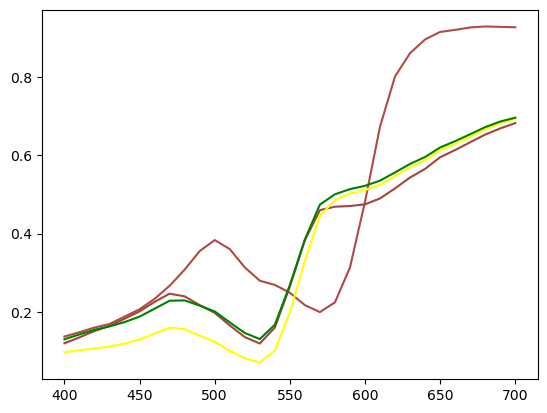

In [78]:
mets["00 00 65 100"].plot()
mets["25 100 00 50"].plot()
cijk_gamut_d65.get_spectra((0.25, 1, 0, 0.5)).plot(color='yellow')
cijk_gamut_d65.get_spectra((0.25, 0.8, 0, 0.5)).plot(color='green')

In [70]:
tetrachromat_d65.observe(mets["00 00 65 100"])

array([ 0.24275437,  0.35067115,  0.39416441,  0.46808126])

In [72]:
tetrachromat_d65.observe(mets["25 100 00 50"])

array([ 0.21563598,  0.33043611,  0.39737697,  0.435523  ])

In [11]:
mets = {}
with open(f'011024.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "Candidates": continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        mets[name] = spectra

In [80]:
data = []
for p, spectra in mets.items():
    data.append((tetrachromat_d65.observe(spectra), p))

data.sort(key=lambda i:i[0][3])
data

[(array([ 0.24253924,  0.24985161,  0.27562422,  0.33258076]), '10 20 80 90'),
 (array([ 0.20033592,  0.26260919,  0.28536251,  0.33338323]), '20 10 70 100'),
 (array([ 0.17653494,  0.27922495,  0.32989511,  0.3584985 ]), '40 100 00 70'),
 (array([ 0.20394111,  0.27844643,  0.30823369,  0.36581493]), '10 10 70 100'),
 (array([ 0.21146501,  0.28307422,  0.33841695,  0.370289  ]), '30 100 20 30'),
 (array([ 0.25023332,  0.26709097,  0.30297986,  0.37375032]), '00 20 80 90'),
 (array([ 0.20611534,  0.31279307,  0.33567722,  0.37793648]), '20 20 60 100'),
 (array([ 0.18337059,  0.28577305,  0.34686546,  0.3814891 ]), '30 100 10 50'),
 (array([ 0.24660325,  0.34784781,  0.3915142 ,  0.41787329]), '40 80 00 70'),
 (array([ 0.37238186,  0.37184211,  0.40972798,  0.43179108]), '40 80 00 10'),
 (array([ 0.21563598,  0.33043611,  0.39737697,  0.435523  ]), '25 100 00 50'),
 (array([ 0.32512508,  0.36224516,  0.41033662,  0.44070801]), '30 80 20 30'),
 (array([ 0.20188455,  0.35387507,  0.3895533

In [148]:
from collections import defaultdict
import itertools
def bucket_points(points, axis=2):
    # modifying to have overlapping boxes,
    # each point will be in 8 boxes
    buckets = defaultdict(list)

    for idx, point in enumerate(points):
        ranges = [(int(100 * round(p, 2)) - 1, int(100 * round(p, 2))) for i, p in enumerate(point) if i!=axis]
        keys = itertools.product(*ranges)

        for key in keys:
            value = (tuple(point), idx)
            buckets[tuple(key)].append(value)
            
    return buckets

In [149]:
met_buckets = bucket_points([d for d, p in data])

In [151]:
sort_buckets(met_buckets)

[(0.03018325933420829, (3, 4)),
 (0.03018325933420829, (3, 4)),
 (0.03018325933420829, (3, 4)),
 (0.03018325933420829, (3, 4)),
 (0.027991633071981215, (18, 16)),
 (0.023986160295888015, (20, 22)),
 (0.023986160295888015, (20, 22)),
 (0.022432481201150545, (20, 21)),
 (0.022432481201150545, (20, 21)),
 (0.012572824545375949, (23, 29)),
 (0.012572824545375949, (23, 29)),
 (0.0062818157387249385, (31, 33)),
 (0.0062818157387249385, (31, 33)),
 (0.0015536790947374701, (21, 22)),
 (0.0015536790947374701, (21, 22))]

In [152]:
(data[3], data[4])

((array([ 0.20394111,  0.27844643,  0.30823369,  0.36581493]), '10 10 70 100'),
 (array([ 0.21146501,  0.28307422,  0.33841695,  0.370289  ]), '30 100 20 30'))

In [153]:
(data[18], data[16])

((array([ 0.24275437,  0.35067115,  0.39416441,  0.46808126]), '00 00 65 100'),
 (array([ 0.25333627,  0.35747972,  0.42215604,  0.45942039]), '25 90 00 50'))

In [154]:
(data[20], data[22])

((array([ 0.24739978,  0.38130065,  0.41907936,  0.47867543]), '05 10 55 90'),
 (array([ 0.25021517,  0.3698273 ,  0.44306552,  0.48506131]), '20 95 00 45'))

In [155]:
(data[20], data[21])

((array([ 0.24739978,  0.38130065,  0.41907936,  0.47867543]), '05 10 55 90'),
 (array([ 0.25400682,  0.3688156 ,  0.44151185,  0.48348798]), '20 90 05 45'))

In [13]:
not_neitz_tetrachromat_d65.observe(mets["10 10 70 100"])

array([ 0.20394111,  0.27844643,  0.30823369,  0.36581493])

In [14]:
not_neitz_tetrachromat_d65.observe(mets["30 100 20 30"])

array([ 0.21146501,  0.28307422,  0.33841695,  0.370289  ])

In [16]:
tetrachromat_d65.observe(mets["10 10 70 100"])

array([ 0.17148516,  0.26750862,  0.28914263,  0.32475766])

In [17]:
tetrachromat_d65.observe(mets["30 100 20 30"])

array([ 0.1873056 ,  0.24727078,  0.2820527 ,  0.31810477])

In [18]:
mets["10 10 50 100"].to_xyz()

array([ 0.40101835,  0.3478014 ,  0.19015482])

In [19]:
mets["30 100 20 30"].to_xyz()

array([ 0.35680484,  0.28694963,  0.19523491])